<a href="https://colab.research.google.com/github/ltrinh74123/Image_classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ndata = 10000
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train[:ndata, :, :, :]
y_train = y_train[:ndata, :]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
X_train.shape

(10000, 32, 32, 3)

In [4]:
X_train_flat = X_train.reshape(ndata, -1)
y_labels = np.argmax(y_train, axis=1)

In [5]:
X_train_flat.shape

(10000, 3072)

In [6]:
y_labels

array([6, 9, 9, ..., 1, 1, 5])

In [7]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
y_classes = [classes[label] for label in y_labels]
y_series = pd.Series(y_classes, name="Class")

In [8]:
import keras
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from tensorflow.random import set_seed

In [9]:
X_train.shape

(10000, 32, 32, 3)

In [10]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2239 - loss: 2.0691 - val_accuracy: 0.3881 - val_loss: 1.6690
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4271 - loss: 1.5762 - val_accuracy: 0.4613 - val_loss: 1.4862
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4966 - loss: 1.3930 - val_accuracy: 0.4862 - val_loss: 1.4145
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5488 - loss: 1.2713 - val_accuracy: 0.5290 - val_loss: 1.3178
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5897 - loss: 1.1611 - val_accuracy: 0.5265 - val_loss: 1.3238
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6313 - loss: 1.0561 - val_accuracy: 0.5618 - val_loss: 1.2318
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6478 - loss: 0.9814 - val_accuracy: 0.5578 - val_loss: 1.2758
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6904 - loss: 0.8984 - val_accuracy: 0

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507,296 (1.94 MB)

 Trainable params: 169,098 (660.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 338,198 (1.29 MB)

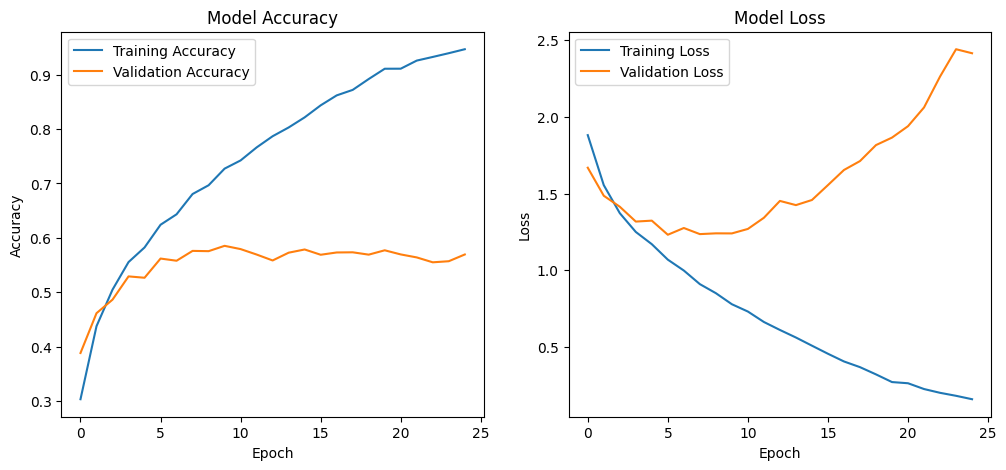

In [55]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [13]:
X_test[1].shape

(32, 32, 3)

In [61]:
import numpy as np
np.random.seed(0)
random_10 = np.random.randint(0, 10000, size=10).astype(int)

predictions = model.predict(X_test)
predict_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

predict = predict_labels[random_10]
truth = y_test_labels[random_10]
image = X_test[random_10]
predict_labels = [classes[label] for label in predict]
truth_labels = [classes[label] for label in truth]



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


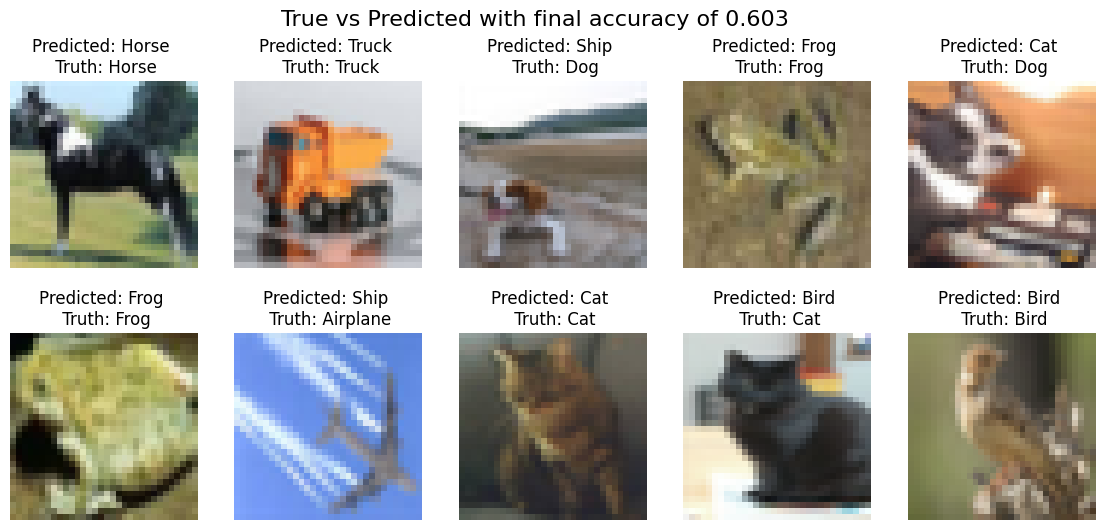

In [62]:
plt.figure(figsize = (14,6))
for i in range(10):
  plt.subplot(2, 5, i + 1)  # Layout: 2 rows, 5 columns, index i+1
  plt.imshow(image[i])
  plt.axis('off')  # Turn off the axis numbers/markings
  plt.title(f'Predicted: {predict_labels[i]} \n Truth: {truth_labels[i]}')
plt.suptitle(f"True vs Predicted with final accuracy of {round(accuracy, 3)}", size = 16)
plt.show()

In [42]:
import scipy.ndimage
def image_augmentation(train_images, augmentation_factor):
  new_images = []
  for i in range(augmentation_factor):
    for image in train_images:
      rotation = np.random.uniform(-20, 20)
      shift_x = np.random.randint(-5, 5)
      shift_y = np.random.randint(-5, 5)
      brightness = np.random.uniform(0.8, 1.2)

      if np.random.uniform(0,1) < 0.5: #Flip 0.5
        aug_image = np.fliplr(image)
      else:
        aug_image = image

      aug_image = scipy.ndimage.shift(aug_image, (shift_y, shift_x, 0))
      aug_image = scipy.ndimage.rotate(aug_image, rotation, reshape=False)
      aug_image = aug_image * brightness
      aug_image = np.clip(aug_image, 0, 1)
      new_images.append(aug_image)

  return np.array(new_images)


In [51]:
train_aug = image_augmentation(X_train, 2)
X_train_new = np.concatenate((X_train, train_aug), axis=0)
y_train_new = np.concatenate((y_train, y_train, y_train), axis = 0)

In [53]:
model = keras. Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D( (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add (Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(X_train_new, y_train_new, epochs=25, batch_size=64, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2826 - loss: 1.9458 - val_accuracy: 0.4657 - val_loss: 1.4756
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4525 - loss: 1.5183 - val_accuracy: 0.5144 - val_loss: 1.3385
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5135 - loss: 1.3669 - val_accuracy: 0.5489 - val_loss: 1.2817
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5590 - loss: 1.2393 - val_accuracy: 0.5862 - val_loss: 1.1720
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5959 - loss: 1.1402 - val_accuracy: 0.5896 - val_loss: 1.1538
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6256 - loss: 1.0624 - val_accuracy: 0.5965 - val_loss: 1.1609
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6430 - loss: 1.0057 - val_accuracy: 0.6061 - val_loss: 1.1420
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6707 - loss: 0.9360 - val_accuracy: 0.

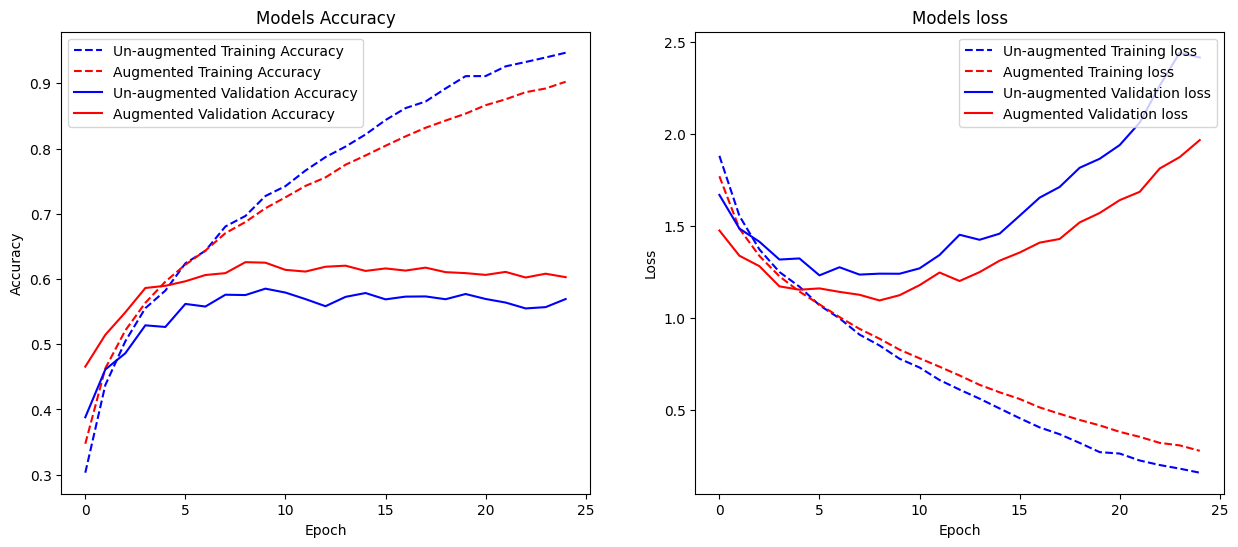

In [60]:
plt.figure(figsize = (15, 6))
plt.subplot (1, 2, 1)
plt.plot(history.history['accuracy'], label='Un-augmented Training Accuracy', linestyle='--', color = "blue")
plt.plot(history2.history['accuracy'], label='Augmented Training Accuracy', linestyle='--', color = "red")
plt.plot(history.history['val_accuracy'], label='Un-augmented Validation Accuracy', color = "blue")
plt.plot(history2.history['val_accuracy'], label='Augmented Validation Accuracy', color = "red")
plt.title('Models Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot (1, 2, 2)
plt.plot(history.history['loss'], label='Un-augmented Training loss', linestyle='--', color = "blue" )
plt.plot(history2.history['loss'], label='Augmented Training loss', linestyle='--', color = "red" )
plt.plot(history.history['val_loss'], label='Un-augmented Validation loss', color = "blue")
plt.plot(history2.history['val_loss'], label='Augmented Validation loss', color = "red")
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()